Привет, Екатерина! Меня зовут Ольга и я буду проверять твою работу. Предлагаю продолжить общение на «ты».

Мои комментарии выглядят так:
        
<div class="alert alert-block alert-success">
<b>Комментарий от ревьюера</b>

Таким цветом отмечены правильные решения.

</div>

<div class="alert alert-block alert-warning">
<b>Комментарий от ревьюера</b>

Таким цветом отмечены дополнения как сделфать работу еще лучше.

</div>

<div class="alert alert-block alert-danger">
<b>Комментарий от ревьюера</b>

Таким цветом отмечены неудачные решения

</div>

<b>Не удаляй эти комментарии и постарайся учесть их в ходе выполнения данного проекта.</b>

Ты можешь оставлять свои комментарии под моими, отметь их каким-нибудь цветом или просто выдели отдельную ячейку.
Например, так:

<div class="alert alert-block alert-info">
<b>Комментарий от студента</b> <a class="tocSkip"></a>
    
Текст комментария
</div>

*дорогой ревьювер,  прошу понять и простить столь запоздалую сдачу проекта, то было целое испытание для меня. при рассчетах для меня было важно выполнить каждый шаг вот так подробно, из раза в раз повторяя типичные действия, поэтому он получился таким громоздким. с наилучшими пожеланиями спокойствия при проверке этого чуда:)*

<div class="alert alert-block alert-success">
<b>Комментарий от ревьюера</b>

Екатерина, большое спасибо, что прислала проект!
    
Не расстраивася, что сдаешь немного позже. Это отлично, что ты любишь делать всё подробно, это очень хорошее качество для аналитика.
    
Проект действительно очень большой, особенно последняя часть с ROMI. Работа получилась очень хорошей. Ты пишешь классный чистый код, строишь отличные графики и делаешь замечательные выводы. Очень классно, что в конце ты еще решила проверить какой источник лучше. Молодец!
    
<span class="text-danger"> Есть небольшие недочеты, но я думаю ты сможешь легко их поправить. Я написала комментарии, надеюсь, они помогут.</span>
    
Очень жду твою новую версию. :)
</div>

<div class="alert alert-block alert-warning">
<b>Комментарий от ревьюера. V.2.</b>

Привет, Екатерина!
    
Спасибо за быстрые правки! Я написала тебе комментарии и пример кода, посмотри, пожалуйста. Если есть еще вопросы, напиши, я постараюсь на них ответить. :)
</div>

<div class="alert alert-block alert-success">
<b>Комментарий от ревьюера. V.3.</b>

Привет, Екатерина!
    
Теперь все отлично! Графики построены, выводы сделаны. У тебя отлично получилось!
    
Дальше будет легче! Удачи в обучении. :)
</div>

# Описание проекта

Вас пригласили на стажировку в отдел маркетинговой аналитики Яндекс.Афиши. Первое задание: помочь маркетологам снизить расходы — отказаться от невыгодных источников трафика и перераспределить бюджет.
Есть данные Яндекс.Афиши с июня 2017 по конец мая 2018 года:
лог сервера с данными о посещениях сайта Яндекс.Афиши,
выгрузка всех заказов за этот период,
статистика рекламных расходов.
Вам предстоит изучить:
как клиенты пользуются сервисом,
когда делают первые покупки на сайте,
сколько денег приносит компании каждый клиент,
когда расходы на привлечение клиента окупаются.

<div class="alert alert-block alert-success">
<b>Комментарий от ревьюера</b>

Отличное начало!Описание проекта дает нам понять, что происходит. :)
</div>

## Загрузить даные и подготовить к анализу 

In [1]:
import pandas as pd
from scipy import stats as st
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

<div class="alert alert-block alert-success">
<b>Комментарий от ревьюера</b>

Отлично! Есть загрузка библиотек в начале!

</div>

In [2]:
visits = pd.read_csv('/datasets/visits_log.csv')
orders = pd.read_csv('/datasets/orders_log.csv')
costs = pd.read_csv('/datasets/costs.csv')

In [3]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null object
Source Id    359400 non-null int64
Start Ts     359400 non-null object
Uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


In [4]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null object
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [5]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


изучили типы данных: необходимо преобразовать данные с датой и временем в нужный тип

In [6]:

visits['Start Ts'] = pd.to_datetime(
    visits['Start Ts'], format="%Y-%m-%d %H:%M"
)
visits['End Ts'] = pd.to_datetime(
    visits['End Ts'], format="%Y-%m-%d %H:%M"
)
orders['Buy Ts'] = pd.to_datetime(
    orders['Buy Ts'], format="%Y-%m-%d %H:%M"
)
costs['dt'] = pd.to_datetime(costs['dt'])


In [7]:
visits.duplicated().sum() 

0

In [8]:
costs.duplicated().sum()

0

In [9]:
orders.duplicated().sum() 

0

<div class="alert alert-block alert-info">
дубликатов нет, идем дальше)
</div>

**Мы имеем три датасета с информацией о визитах и покупках на сайте, а также статистика рекламных расходов. Данные полные, дубликатов нет, пропусков тоже. Из преобразований необходимы только манипуляции со временем**

<div class="alert alert-block alert-success">
<b>Комментарий от ревьюера</b>

Данные загрузили и поменяли типы данных, отлично!

</div>

<div class="alert alert-block alert-danger">
<b>Комментарий от ревьюера</b>

А почему мы поменяли типы? Давай выведем для примера несколько строк из каждого датасета(достаточно head()), посмотрим на колонки методом info() и тогда уже будем что-то менять.Также стоит провести проверку на пропущенные значения и дубликаты, чтобы убедиться, что данные впорядке. В конце раздела лучше добавить вывод. :)

</div>

<div class="alert alert-block alert-warning">
<b>Комментарий от ревьюера. V.2.</b>

Постарайся добавить head() следующих проектах. Важно иметь пример изначального датасета для оценки измнений. :)
</div>

## Рассчет метрик и графики

### Продуктовые метрики

выделим в отдельные столбцы год, месяц и неделю, а также полную дату.

In [10]:
visits['session_year']  = visits['Start Ts'].dt.year
visits['session_month'] = visits['Start Ts'].astype('datetime64[M]')
visits['session_week']  = visits['Start Ts'].astype('datetime64[W]')
visits['session_date']  = visits['Start Ts'].dt.date

**Посчитаем метрики DAU, WAU, MAU**

In [11]:
dau = visits.groupby('session_date').agg({'Uid': 'nunique'})
wau = visits.groupby('session_week').agg({'Uid': 'nunique'})
mau = visits.groupby('session_month').agg({'Uid': 'nunique'})

print(dau.mean())
print(wau.mean())
print(mau.mean())

Uid    907.991758
dtype: float64
Uid    5724.415094
dtype: float64
Uid    23228.416667
dtype: float64


построим графики изменений метрик во времени

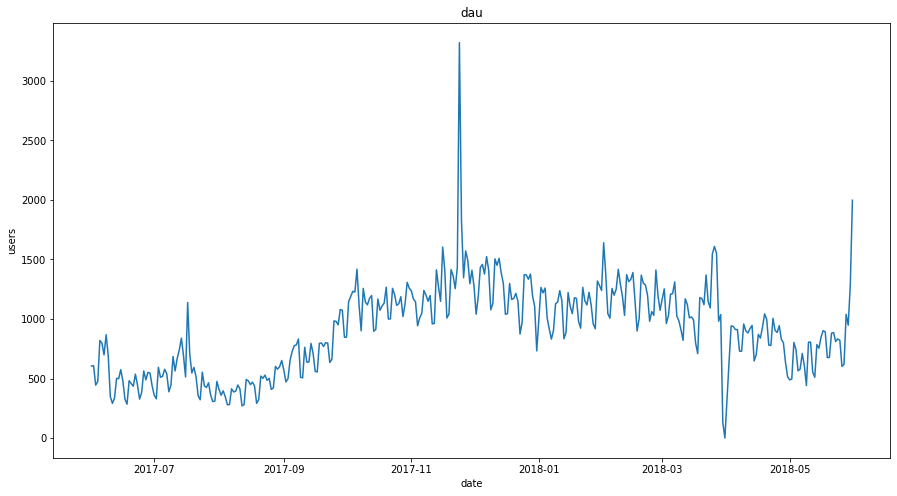

In [12]:
fig, ax = plt.subplots(figsize=(15,8))
ax.plot(dau)
ax.set(title = 'dau', xlabel = 'date', ylabel = 'users')

plt.show()

*предновогодний ажиотаж виден в графиках по дням, а весной жуткий провал. в остальное время года наблюдается некоторая стабильность*

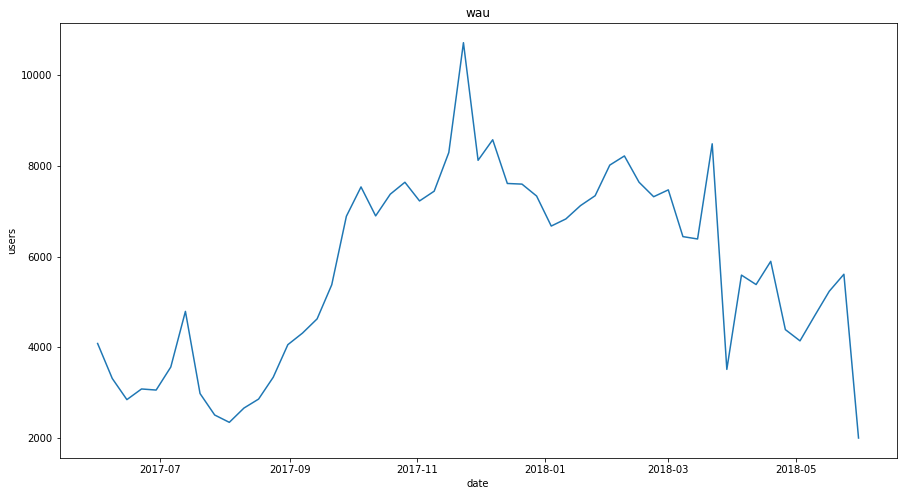

In [13]:
fig, ax = plt.subplots(figsize=(15,8))
ax.plot(wau)
ax.set(title = 'wau', xlabel = 'date', ylabel = 'users')
plt.show()

*рассматривая недельное количество пользователей, становится более ясным распределение и так называемая сезонность*

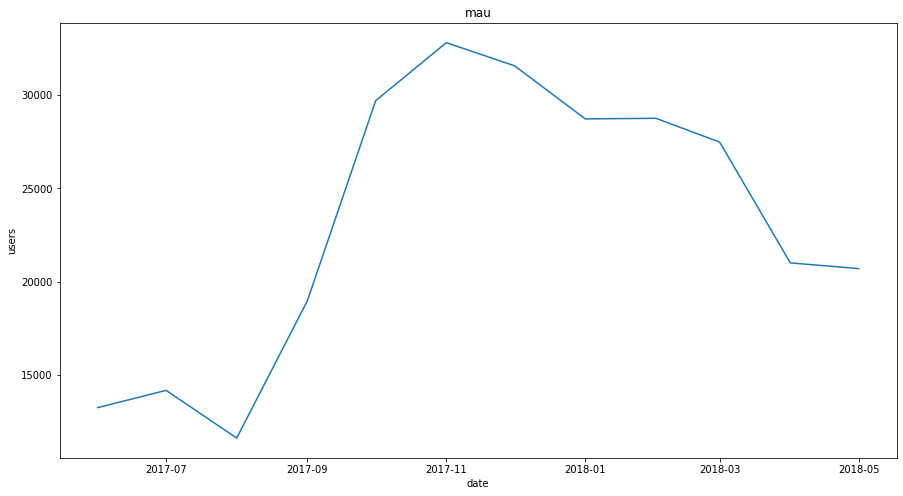

In [14]:
fig, ax = plt.subplots(figsize=(15,8))
ax.plot(mau)
ax.set(title = 'mau', xlabel = 'date', ylabel = 'users')
plt.show()

*месячное распределение ставит все на свои места - пик зимой, спад летом. оно и понятно, - летом актеры в отпуске,а к зиме, как правило, запускают премьеры и тематические предновогодние спектакли/концерты/выставки*

<div class="alert alert-block alert-success">
<b>Комментарий от ревьюера</b>

Супер! Мы верно определили количество пользователей и нарисовали классные графики!

</div>

<div class="alert alert-block alert-danger">
<b>Комментарий от ревьюера</b>

~Давай добавим выводы к каждому графику? Не зря же мы рассматривали и дни, и недели, и месяцы. :)~

</div>

<div class="alert alert-block alert-success">
<b>Комментарий от ревьюера. V.2.</b>

Отлично! Сезонность у нас играет очень большую роль.И да, она у нас больше праздничная. :)

</div>

**Сколько раз в день пользователи в среднем заходят на сайт?**

In [15]:
s_per_user = visits.groupby('session_date').agg({'Uid': ['count', 'nunique']})
s_per_user.columns = ['nsessions', 'nusers']
s_per_user['s_per_user'] = s_per_user['nsessions'] / s_per_user['nusers']

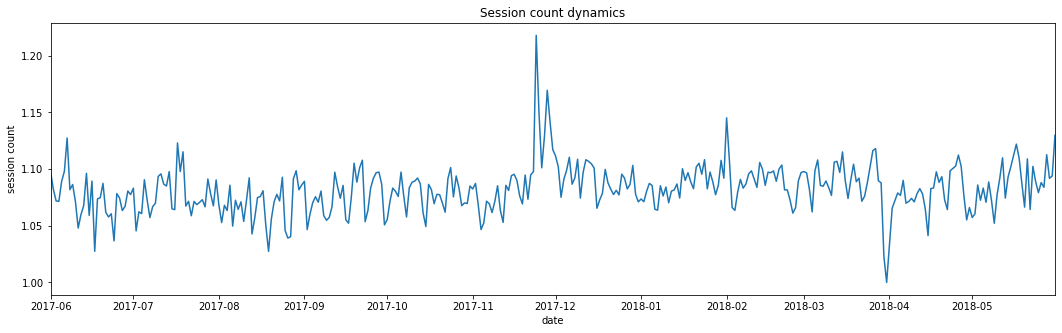

In [16]:
plt.figure(figsize= (18,5))
s_per_user['s_per_user'].plot().set(title='Session count dynamics', xlabel='date', ylabel='session count')
plt.show()

In [17]:
print('Среднее количество пользователей, которые заходят на сайт:', s_per_user['s_per_user'].mean())

Среднее количество пользователей, которые заходят на сайт: 1.082169644003972


*Маловато, конечно.Сезонность вполне объяснима типом сервиса: театральными и концертными сезонами, премьерами фильмов*

<div class="alert alert-block alert-success">
<b>Комментарий от ревьюера</b>

В декабре точно что-то происходит! :) 

</div>


<div class="alert alert-block alert-warning">
<b>Комментарий от ревьюера</b>

Итак, у нас есть сервис Афиша. Там всякие мероприятия анонсируются и можно купить билеты, а в декабре всплеск посещений. Как ты думаешь,почему? И почему у нас спад в апреле?

</div>

<div class="alert alert-block alert-danger">
<b>Комментарий от ревьюера</b>

~Так сколько раз в день пользователи в среднем заходят на сайт?  Выведи число,пожалуйста. :)~

</div>

<div class="alert alert-block alert-success">
<b>Комментарий от ревьюера. V.2.</b>

Да, пользователь заходит в среднем 1 раз. Маловато!

</div>

**Исследуем длительность каждой сессии**

In [18]:
visits['ses_dur_sec'] = (visits['End Ts'] - visits['Start Ts']).dt.seconds

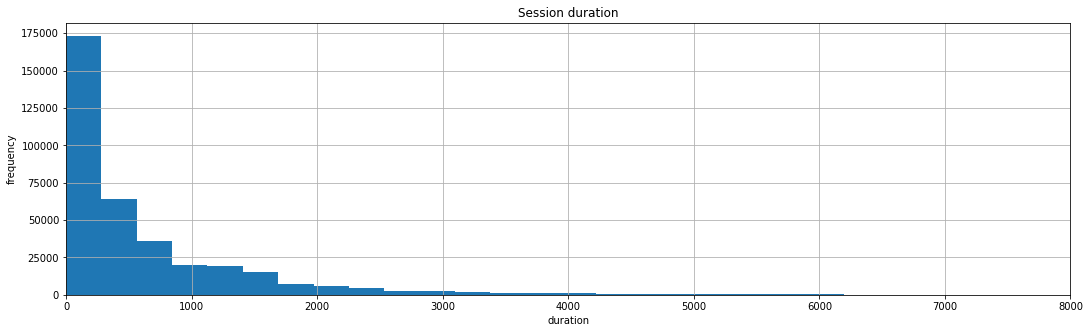

In [19]:
plt.figure(figsize=(18,5))
visits['ses_dur_sec'].hist(bins=300).set(title = 'Session duration', xlabel = 'duration', ylabel = 'frequency')
plt.xlim(0,8000)
plt.show()

In [20]:
print('Медиана длительности каждой сессии:', visits['ses_dur_sec'].median())
print('Среднее длительности каждой сессии:', visits['ses_dur_sec'].mean())

Медиана длительности каждой сессии: 300.0
Среднее длительности каждой сессии: 643.506488592098


*большинство сессий - короткие, есть выбросы не похожие на правду - сессии, длиной в 8 тыщ секунд, почти сутки - предположительно, что пользователь открыл сайт и забыл об этом) за 10 минут как раз в целом можно выбрать мероприятие и купить билет*


<div class="alert alert-block alert-success">
<b>Комментарий от ревьюера</b>

Отлично! График очень в тему,видим, что у нас ненормальное распределение.

</div>

<div class="alert alert-block alert-warning">
<b>Комментарий от ревьюера</b>

Можно рассмотреть конкретно медиану/моду/среднее и предположить, что пользователь может сделать за указанное время.
    
Как ты думаешь, с чем могут быть связаны длиннющие сессии?

</div>

<div class="alert alert-block alert-danger">
<b>Комментарий от ревьюера</b>

~Тут тоже стоит добавить конкретные числа.:)~

</div>

<div class="alert alert-block alert-success">
<b>Комментарий от ревьюера. V.2.</b>

Отлично! Предположения про время отличные, они вполне реальны.
</div>

**Расчет Retention Rate, когортный анализ**

определяем дату и время первой сессии для когортного анализа

In [21]:
fvisits = visits.groupby('Uid').agg({'Start Ts': 'min'}).reset_index()
fvisits.columns = ['Uid', '1session_start']


определяем первую дату и месяц визита

In [22]:
fvisits['fst_sess_date'] = fvisits['1session_start'].dt.date
fvisits['fst_sess_month'] = fvisits['1session_start'].astype('datetime64[M]')

сливаем на основании айди посетителя

In [23]:
visits_df = pd.merge(fvisits, visits, on = 'Uid')


определяем возраст когорты

In [24]:
visits_df['cohort_age'] = ((visits_df['session_month'] - visits_df['fst_sess_month']) / np.timedelta64(1,'M')).round().astype('int')

красивый когортный анализ

In [25]:
cohorts = visits_df.pivot_table(index='fst_sess_month',
                               columns='cohort_age',
                               values='Uid',
                               aggfunc='nunique')
cohorts.fillna('')


cohort_age,0,1,2,3,4,5,6,7,8,9,10,11
fst_sess_month,,,,,,,,,,,,
2017-06-01,13259.0,1043,713,814,909,947,809,766,694,674,539,596
2017-07-01,13140.0,737,674,738,765,633,596,601,510,376,361,
2017-08-01,10181.0,783,640,639,510,448,370,402,284,265,,
2017-09-01,16704.0,1428,1156,847,658,632,599,404,381,,,
2017-10-01,25977.0,2042,1357,1012,890,837,555,529,,,,
2017-11-01,27248.0,2133,1202,1054,919,638,594,,,,,
2017-12-01,25268.0,1410,960,786,512,481,,,,,,
2018-01-01,22624.0,1351,890,565,458,,,,,,,
2018-02-01,22197.0,1267,565,446,,,,,,,,


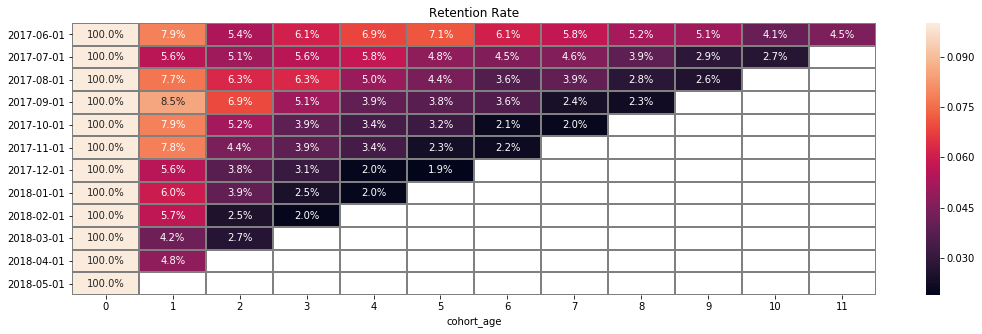

In [26]:
retention = pd.DataFrame()
for col in cohorts.columns:
    retention = pd.concat([retention, cohorts[col]/cohorts[0]], axis=1)
retention.columns = cohorts.columns
retention.index = [str(x)[0:10] for x in retention.index]
plt.figure(figsize=(18,5))
sns.heatmap(retention, annot=True, fmt='.1%', linewidths=1, linecolor='grey', vmax=0.1).set(title='Retention Rate')
plt.show()

In [27]:
retention.describe()

cohort_age,0,1,2,3,4,5,6,7,8,9,10,11
count,12.0,11.000000,10.000000,9.000000,8.000000,7.000000,6.000000,5.000000,4.000000,3.000000,2.000000,1.000000
mean,1.0,0.065167,0.046333,0.042760,0.040595,0.039444,0.036957,0.037509,0.035465,0.035159,0.034062,0.044951
std,0.0,0.014757,0.014307,0.015761,0.017316,0.017549,0.014992,0.015441,0.013083,0.013636,0.009318,NaN
min,1.0,0.041818,0.025454,0.020093,0.020244,0.019036,0.021365,0.020364,0.022809,0.026029,0.027473,0.044951
25%,1.0,0.055945,0.038329,0.031107,0.030361,0.027818,0.025315,0.024186,0.026624,0.027322,0.030768,0.044951
50%,1.0,0.059715,0.047704,0.038958,0.036826,0.037835,0.036101,0.039485,0.033354,0.028615,0.034062,0.044951
75%,1.0,0.078444,0.053391,0.056164,0.052125,0.046089,0.043104,0.045738,0.042195,0.039724,0.037357,0.044951
max,1.0,0.085489,0.069205,0.062764,0.068557,0.071423,0.061015,0.057772,0.052342,0.050833,0.040652,0.044951


средний RR на второй месяц жизни когорт 6%

<div class="alert alert-block alert-success">
<b>Комментарий от ревьюера</b>

Отлично! Ты справилась с первым сложным разделом в этом проекте!
    
Retention нас тут не очень радует, но что поделать. :)

</div>

**Среднее количество уникальных пользователей в день - 907, в неделю - 5724, в месяц -  23228.
Наибольший всплеск пользователей наблюдается в ноябре-декабре.
Каждый уникальный пользователь в среднем заходит один раз и длительность сессий короткая.
Средний RR на второй месяц жизни 6%, самой "успешной" на второй месяц стала сентябрьская когорта. В целом, хорошую динамику показывают когорты июня и августа**

<div class="alert alert-block alert-success">
<b>Комментарий от ревьюера</b>

Супер,что есть вывод по разделу!

</div>

### Метрики электронной коммерции

**2.2.1. Среднее время между первым посещением сайта и покупкой**

In [28]:
orders['Buy Ts'] = orders['Buy Ts'].dt.date
orders['order_month'] = orders['Buy Ts'].astype('datetime64[M]')

In [29]:
#время первой покупки
first_order = orders.groupby('Uid').agg({'Buy Ts': 'min'}).reset_index()
first_order.columns = ['Uid', 'first_order_time']
#first_order['first_order_date'] = first_order['first_order_time'].dt.date
first_order['first_order_month'] = first_order['first_order_time'].astype('datetime64[M]')


In [30]:
buyers = pd.merge(fvisits, first_order, on = 'Uid')
buyers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36523 entries, 0 to 36522
Data columns (total 6 columns):
Uid                  36523 non-null uint64
1session_start       36523 non-null datetime64[ns]
fst_sess_date        36523 non-null object
fst_sess_month       36523 non-null datetime64[ns]
first_order_time     36523 non-null object
first_order_month    36523 non-null datetime64[ns]
dtypes: datetime64[ns](3), object(2), uint64(1)
memory usage: 2.0+ MB


In [31]:
#снова переводим в формат времени пару столбцов
buyers['fst_sess_date'] = pd.to_datetime(buyers['fst_sess_date'])
buyers['first_order_time'] = pd.to_datetime(buyers['first_order_time'])

In [32]:
buyers['days_1purchase'] = ((buyers['first_order_time'] - buyers['fst_sess_date']) / np.timedelta64(1, 'D')).astype('int')

In [33]:
buyers

,Uid,1session_start,fst_sess_date,fst_sess_month,first_order_time,first_order_month,days_1purchase
0,313578113262317,2017-09-18 22:49:00,2017-09-18,2017-09-01,2018-01-03,2018-01-01,107
1,1575281904278712,2017-06-03 10:13:00,2017-06-03,2017-06-01,2017-06-03,2017-06-01,0
2,2429014661409475,2017-10-11 17:14:00,2017-10-11,2017-10-01,2017-10-11,2017-10-01,0
3,2464366381792757,2018-01-27 20:10:00,2018-01-27,2018-01-01,2018-01-28,2018-01-01,1
4,2551852515556206,2017-11-24 10:14:00,2017-11-24,2017-11-01,2017-11-24,2017-11-01,0
...,...,...,...,...,...,...,...
36518,18445147675727495770,2017-08-20 13:30:00,2017-08-20,2017-08-01,2017-11-24,2017-11-01,96
36519,18445407535914413204,2017-09-22 23:48:00,2017-09-22,2017-09-01,2017-09-22,2017-09-01,0
36520,18445601152732270159,2017-08-07 11:51:00,2017-08-07,2017-08-01,2018-03-26,2018-03-01,231
36521,18446156210226471712,2017-11-07 10:01:00,2017-11-07,2017-11-01,2018-02-18,2018-02-01,103


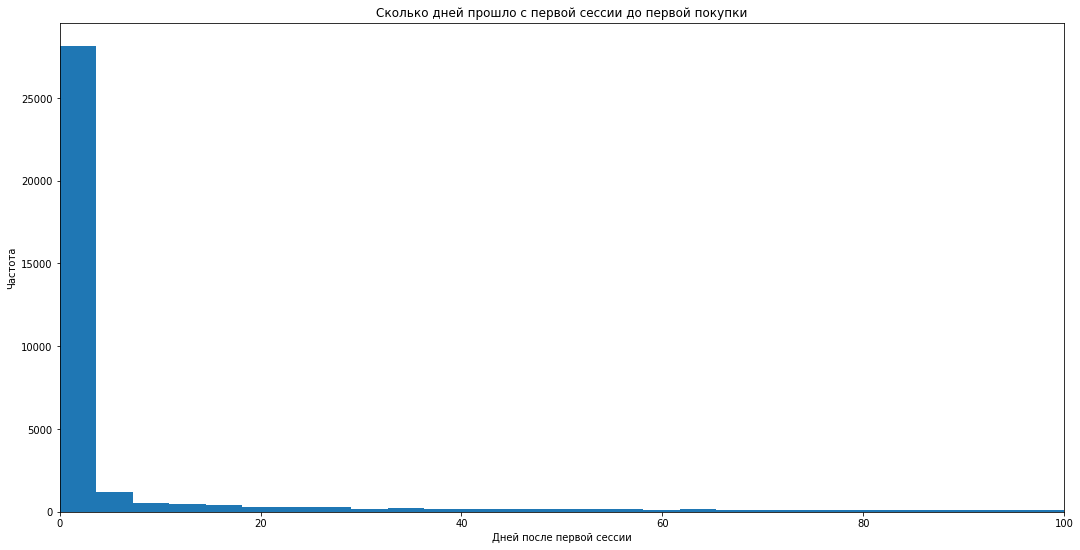

In [34]:
(buyers['days_1purchase'].plot(kind='hist', bins=100, figsize=(18,9)).set(title = 'Сколько дней прошло с первой сессии до первой покупки',
                                                                          xlabel = 'Дней после первой сессии',
                                                                          ylabel = 'Частота'))
plt.xlim(0,100)
plt.show()

**среднее количество дней между первой сессией и покупкой = 0, значит, что, в среднем, покупка совершается в тот же день первой сессии. хороший показатель работы сайта**

<div class="alert alert-block alert-success">
<b>Комментарий от ревьюера</b>

Тут лучше было бы рассматривать в секундах или минутах, но так тоже хорошо. :)

</div>

**2.2.2. Среднее количество покупок на 1 покупателя**

In [35]:
cohort_size = buyers.groupby('first_order_month').agg({'Uid': 'nunique'}).reset_index()
cohort_size.rename(columns={'Uid':'n_buyers'}, inplace=True)

cohorts1 = pd.merge(orders, buyers, how='inner', on='Uid').groupby(['first_order_month', 'order_month']).agg({'Revenue': 'count'}).reset_index()

cohorts1.head()

,first_order_month,order_month,Revenue
0,2017-06-01,2017-06-01,2354
1,2017-06-01,2017-07-01,177
2,2017-06-01,2017-08-01,174
3,2017-06-01,2017-09-01,226
4,2017-06-01,2017-10-01,292


In [36]:
#возраст когорты
cohorts1['age_month'] = ((cohorts1['order_month'] - cohorts1['first_order_month']) / np.timedelta64(1, 'M')).round()
cohorts1.columns = ['first_order_month', 'order_month', 'n_orders', 'age_month']

#количество покупок на посетителя
cohorts_report = pd.merge(cohort_size, cohorts1, on = 'first_order_month')
cohorts_report['orders_per_buyer'] = cohorts_report['n_orders'] / cohorts_report['n_buyers']

In [37]:
cohorts_report

,first_order_month,n_buyers,order_month,n_orders,age_month,orders_per_buyer
0,2017-06-01,2023,2017-06-01,2354,0.0,1.163618
1,2017-06-01,2023,2017-07-01,177,1.0,0.087494
2,2017-06-01,2023,2017-08-01,174,2.0,0.086011
3,2017-06-01,2023,2017-09-01,226,3.0,0.111715
4,2017-06-01,2023,2017-10-01,292,4.0,0.144340
...,...,...,...,...,...,...
74,2018-03-01,3533,2018-05-01,176,2.0,0.049816
75,2018-04-01,2276,2018-04-01,2495,0.0,1.096221
76,2018-04-01,2276,2018-05-01,195,1.0,0.085677
77,2018-05-01,2988,2018-05-01,3249,0.0,1.087349


накопительная доля покупок на 1 пользователя

In [38]:
cohorts_age = cohorts_report.pivot_table(index='first_order_month', columns='age_month', values='orders_per_buyer', aggfunc='sum').cumsum(axis=1)
cohorts_age.fillna('')


age_month,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0
first_order_month,,,,,,,,,,,,
2017-06-01,1.163618,1.25111,1.33712,1.44884,1.59318,1.70094,1.83737,1.92338,2.02818,2.10381,2.15126,2.19377
2017-07-01,1.136765,1.18877,1.25117,1.30525,1.34269,1.38534,1.41706,1.44306,1.47322,1.4857,1.51326,
2017-08-01,1.118978,1.19781,1.2708,1.32993,1.39197,1.43723,1.47299,1.52993,1.5635,1.59708,,
2017-09-01,1.136381,1.22123,1.28361,1.34715,1.37311,1.41534,1.45719,1.47888,1.50252,,,
2017-10-01,1.143779,1.21613,1.25346,1.28157,1.31129,1.33502,1.35484,1.38364,,,,
2017-11-01,1.179368,1.27665,1.32124,1.37295,1.40627,1.42073,1.44572,,,,,
2017-12-01,1.152635,1.21424,1.26032,1.30116,1.32078,1.34474,,,,,,
2018-01-01,1.121554,1.18796,1.2351,1.25408,1.2772,,,,,,,
2018-02-01,1.121611,1.18242,1.20515,1.22432,,,,,,,,


Среднее количество покупок на 1 покупателя за 6 месяцев

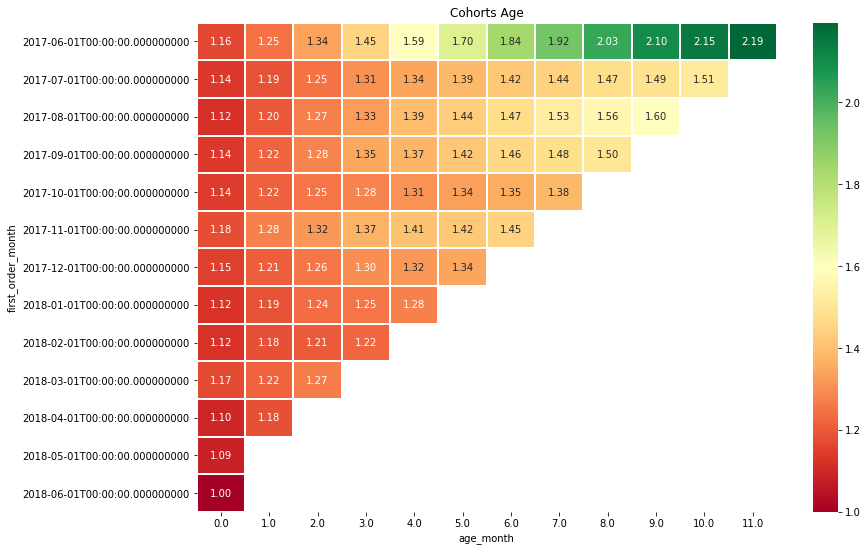

In [39]:
plt.figure(figsize=(13, 9))
sns.heatmap(cohorts_age ,annot=True, fmt='.2f', linewidths=1, cmap="RdYlGn").set(title='Cohorts Age')
plt.show()

In [40]:
round(cohorts_age[5].mean(), 2)

1.43

<div class="alert alert-block alert-success">
<b>Комментарий от ревьюера</b>

Весьма печальный результат для сервиса. Как он вообще существует с таким количеством покупок?

</div>

<div class="alert alert-block alert-warning">
<b>Комментарий от ревьюера</b>

Если уж мы делаем когортную таблицу, то лучше добавить heatmap для наглядности. :)

</div>

<div class="alert alert-block alert-success">
<b>Комментарий от ревьюера. V.2.</b>

Красота!
</div>

**2.2.3 Средний чек**

рассчитаем средний чек по месяцам и сразу отобразим на графике

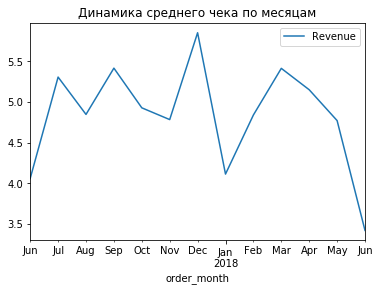

In [41]:
orders.pivot_table(index='order_month', values='Revenue', aggfunc='mean').plot().set(title='Динамика среднего чека по месяцам')
plt.show()

как и в начале с посещениями, значительно увеличивается показатель в ноябре-декабре. можно предположить, что пользователи не зря заходили на сайт:)

In [42]:
#добавим еще средний чек за весь период для сравнения, как сильно колеблется чек на графиках
round(orders['Revenue'].mean(), 2)

5.0

<div class="alert alert-block alert-success">
<b>Комментарий от ревьюера</b>

Ну не зря точно, хоть немного они увеличили нам прибыль! 

</div>

**2.2.4. LTV**

посчитаем выручку

In [43]:
cohorts_ltv = pd.merge(orders, buyers, how='inner', on='Uid').groupby(['first_order_month', 'order_month']).agg({'Revenue': 'sum'}).reset_index()

cohorts_ltv.head()

,first_order_month,order_month,Revenue
0,2017-06-01,2017-06-01,9557.49
1,2017-06-01,2017-07-01,981.82
2,2017-06-01,2017-08-01,885.34
3,2017-06-01,2017-09-01,1931.30
4,2017-06-01,2017-10-01,2068.58


In [44]:
# снова возраст когорты
cohorts_ltv['age_month'] = ((cohorts1['order_month'] - cohorts1['first_order_month']) / np.timedelta64(1, 'M')).round()
cohorts_ltv.columns = ['first_order_month', 'order_month', 'revenue', 'age_month']


In [45]:
# считаем выручку на каждого покупателя
cohorts_report_ltv = pd.merge(cohort_size, cohorts_ltv, on = 'first_order_month')
cohorts_report_ltv['revenue_per_buyer'] = cohorts_report_ltv['revenue'] / cohorts_report['n_buyers']

In [46]:
# теперь показываем накопительную выручку на покупателя
cohorts_age_ltv = cohorts_report_ltv.pivot_table(index='first_order_month', columns='age_month', values='revenue_per_buyer', aggfunc='sum').cumsum(axis=1)
cohorts_age_ltv.round(2).fillna('')

age_month,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0
first_order_month,,,,,,,,,,,,
2017-06-01,4.72,5.21,5.65,6.6,7.62,8.36,9.31,9.89,10.45,11.05,11.62,11.88
2017-07-01,6.01,6.35,6.97,7.33,7.5,7.66,7.78,7.92,8.08,8.23,8.39,
2017-08-01,5.28,5.75,6.21,6.6,7.09,7.38,7.59,7.99,8.28,8.47,,
2017-09-01,5.64,6.76,7.28,11.26,11.66,12.31,13.01,13.25,13.44,,,
2017-10-01,5.00,5.54,5.73,5.89,6.04,6.16,6.24,6.36,,,,
2017-11-01,5.15,5.55,5.75,6.08,6.23,6.28,6.4,,,,,
2017-12-01,4.74,5,5.92,6.99,7.3,7.64,,,,,,
2018-01-01,4.14,4.43,4.73,4.88,4.94,,,,,,,
2018-02-01,4.16,4.44,4.51,4.59,,,,,,,,


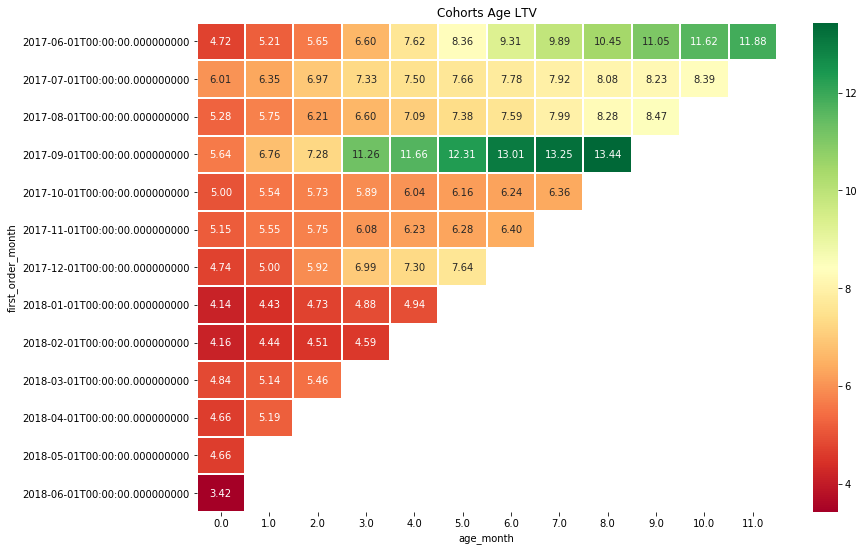

In [47]:
plt.figure(figsize=(13, 9))
sns.heatmap(cohorts_age_ltv ,annot=True, fmt='.2f', linewidths=1, cmap="RdYlGn").set(title='Cohorts Age LTV')
plt.show()

**Так же как и в таблице RR - выделяются когорты июня и сентября.
средний чек, традиционно, перед Новым годом выше,а после него - яма.
Покупки, в среднем, совершаются в первый же день посещения сайта - хороший знак. Дальше нужно будет определять источники.**

<div class="alert alert-block alert-success">
<b>Комментарий от ревьюера</b>

Отичные выводы! 
</div>

<div class="alert alert-block alert-warning">
<b>Комментарий от ревьюера</b>

Тут тоже можно добавить heatmap. :) 

</div>

<div class="alert alert-block alert-info">
добавили наглядности)
</div>

<div class="alert alert-block alert-success">
<b>Комментарий от ревьюера. V.2.</b>

Все эти heatmap мы рисуем в основном для заказчика, конечно. Но для аналитиков тоже полезно, цвет даёт наглядности, не надо вчитываться в цифры для общих выводов. :)
</div>

### Маркетинговые метрики

**2.3.1. Общая сумма расходов на маркетинг**

In [48]:
print('Общие расходы на маркетинг составили {}'.format(costs['costs'].sum()))

Общие расходы на маркетинг составили 329131.62


<div class="alert alert-block alert-success">
<b>Комментарий от ревьюера</b>

Неплохо так потратили!

</div>

In [49]:
#добавим месяц в таблицу для распределения метрики
costs['costs_month'] = costs['dt'].astype('datetime64[M]')

In [50]:
#выведем расхожы по каждому источнику
print(costs.groupby('source_id').agg({'costs':'sum'}))

               costs
source_id           
1           20833.27
2           42806.04
3          141321.63
4           61073.60
5           51757.10
9            5517.49
10           5822.49


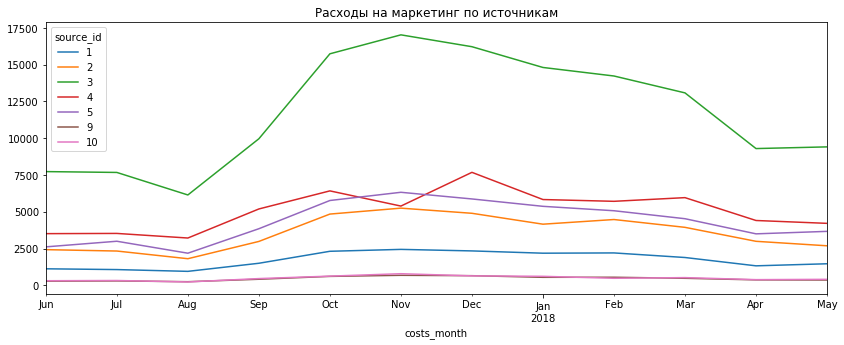

In [51]:
(costs.pivot_table(index='costs_month', columns='source_id', values='costs', aggfunc='sum').plot(figsize=(14,5), title='Расходы на маркетинг по источникам'))
plt.show()

источник под кодовым названием "3" - самый затратный в целом, 5 и 10 - самые бюджетные, а в декабре пик затрат у 4 источника

<div class="alert alert-block alert-success">
<b>Комментарий от ревьюера</b>

График очень наглядный, молодец, что его выбрала. Отлично, что определены и затратные, и бюджетные источники.

</div>

**САС**

In [52]:
#средний САС на покупателя всего
round(costs['costs'].sum() / orders['Uid'].nunique(), 2)

9.01

<div class="alert alert-block alert-success">
<b>Комментарий от ревьюера</b>

Верно!
</div>

In [53]:
#расходы на маркетинг по месяцам
costs_source = costs.groupby(['costs_month','source_id']) \
     .agg({'costs': 'sum'}) \
     .reset_index()
costs_source.columns = ['month', 'source_id', 'costs' ]

In [54]:

costs_source


,month,source_id,costs
0,2017-06-01,1,1125.61
1,2017-06-01,2,2427.38
2,2017-06-01,3,7731.65
3,2017-06-01,4,3514.80
4,2017-06-01,5,2616.12
...,...,...,...
79,2018-05-01,3,9411.42
80,2018-05-01,4,4214.21
81,2018-05-01,5,3669.56
82,2018-05-01,9,362.17


In [55]:
first_visits = visits.groupby(['Uid', 'Source Id']) \
   .agg({'Start Ts': 'min'}) \
   .reset_index()
#найдем первый источник, откуда пришел пользователь

In [56]:
first_visits

,Uid,Source Id,Start Ts
0,11863502262781,3,2018-03-01 17:27:00
1,49537067089222,2,2018-02-06 15:55:00
2,297729379853735,3,2017-06-07 18:47:00
3,313578113262317,2,2017-09-18 22:49:00
4,325320750514679,5,2017-09-30 14:29:00
...,...,...,...
277865,18446403737806311543,5,2017-11-30 03:36:00
277866,18446424184725333426,4,2017-12-06 20:32:00
277867,18446556406699109058,3,2018-01-01 16:29:00
277868,18446621818809592527,4,2017-12-27 13:27:00


In [57]:
#добавить информацию об источнике к таблице buyers
buyers_SI = pd.merge(buyers, first_visits, on='Uid')
buyers_SI

,Uid,1session_start,fst_sess_date,fst_sess_month,first_order_time,first_order_month,days_1purchase,Source Id,Start Ts
0,313578113262317,2017-09-18 22:49:00,2017-09-18,2017-09-01,2018-01-03,2018-01-01,107,2,2017-09-18 22:49:00
1,1575281904278712,2017-06-03 10:13:00,2017-06-03,2017-06-01,2017-06-03,2017-06-01,0,10,2017-06-03 10:13:00
2,2429014661409475,2017-10-11 17:14:00,2017-10-11,2017-10-01,2017-10-11,2017-10-01,0,3,2017-10-11 17:14:00
3,2464366381792757,2018-01-27 20:10:00,2018-01-27,2018-01-01,2018-01-28,2018-01-01,1,5,2018-01-27 20:10:00
4,2551852515556206,2017-11-24 10:14:00,2017-11-24,2017-11-01,2017-11-24,2017-11-01,0,5,2017-11-24 10:14:00
...,...,...,...,...,...,...,...,...,...
57260,18446156210226471712,2017-11-07 10:01:00,2017-11-07,2017-11-01,2018-02-18,2018-02-01,103,1,2018-02-08 15:48:00
57261,18446156210226471712,2017-11-07 10:01:00,2017-11-07,2017-11-01,2018-02-18,2018-02-01,103,3,2017-11-07 10:01:00
57262,18446156210226471712,2017-11-07 10:01:00,2017-11-07,2017-11-01,2018-02-18,2018-02-01,103,4,2017-11-07 12:52:00
57263,18446156210226471712,2017-11-07 10:01:00,2017-11-07,2017-11-01,2018-02-18,2018-02-01,103,5,2018-02-14 21:05:00


In [58]:
#уникальные покупатели по месяцу и источнику
buyers_SI = buyers_SI.groupby(['first_order_month', 'Source Id']).agg({'Uid':'nunique'}).reset_index()
buyers_SI.columns = ['month', 'source_id', 'n_buyers']

In [59]:
buyers_SI

,month,source_id,n_buyers
0,2017-06-01,1,401
1,2017-06-01,2,457
2,2017-06-01,3,874
3,2017-06-01,4,644
4,2017-06-01,5,571
...,...,...,...
81,2018-05-01,4,987
82,2018-05-01,5,703
83,2018-05-01,9,98
84,2018-05-01,10,164


In [60]:
#объединим ежемесячный расход на маркетинг с уникальными покупателями по источнику
cac = pd.merge(costs_source, buyers_SI, on=['month','source_id'])
cac

,month,source_id,costs,n_buyers
0,2017-06-01,1,1125.61,401
1,2017-06-01,2,2427.38,457
2,2017-06-01,3,7731.65,874
3,2017-06-01,4,3514.80,644
4,2017-06-01,5,2616.12,571
...,...,...,...,...
79,2018-05-01,3,9411.42,1006
80,2018-05-01,4,4214.21,987
81,2018-05-01,5,3669.56,703
82,2018-05-01,9,362.17,98


In [61]:
#рассчитаем сас
cac['cac'] = (cac['costs'] / cac['n_buyers']).round(2)

In [62]:
cac.rename(columns={'month':'first_order_month'}, inplace=True)

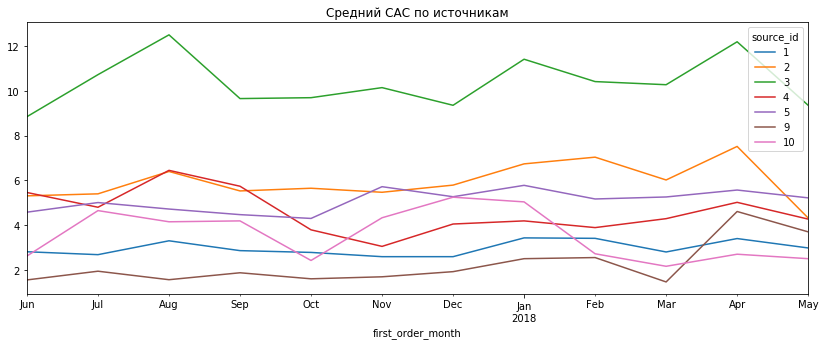

In [63]:
(cac.pivot_table(index='first_order_month', columns='source_id', values='cac', aggfunc='mean').plot(figsize=(14,5), \
title='Средний CAC по источникам'))
plt.show()

<div class="alert alert-block alert-danger">
<b>Комментарий от ревьюера</b>

График почти верный. Проверь, пожалуйста, расчеты. Ты пишешь: "будем потом объединять с покупателями", но добавляешь таблицу first visits. Попробуй сделать так:

- найти, первый рекламный источник, из которого пришел каждый пользователь
- добавить информацию к твоей замечательной таблице buyers
- сгруппировать buyers по source_id и дате первой покупки и добавить туда подсчет uid(это будет число покуптелей)
- соединить полученную таблицу с costs. Тут отлично подойдет соединение с использованием left_on и right_on.
- всё, можно считать расходы на покупателя, строить своднуютаблицу и график.
    
Для проверки можно создать таблицу среднего САС по источникам, колонок будет 2: сам источник и средняя цена. Всё должно быть в пределах 6,56-16,29. :)
</div>

<div class="alert alert-block alert-info">
если я все правильно поняла, то у меня был один лишний шаг, а итоговая таблица отлично слепилась с buyers)
</div>

<div class="alert alert-block alert-warning">
<b>Комментарий от ревьюера. V.2.</b>

Почти! Всё таки второй источник у нас тут тоже большой.
    
Попробуй сравнить мой пример со своим кодом. :)
</div>

In [64]:
# определим дату и время первой сессии каждого пользователя.
first_visits = visits.groupby('Uid').agg({'Start Ts': 'min'}).reset_index()
first_visits.columns = ['Uid', 'first_session_start_ts']

# для удобства группировки, добавим колонки даты и месяца
first_visits['first_session_dt'] = first_visits['first_session_start_ts'].dt.date
first_visits['first_session_month'] = first_visits['first_session_start_ts'].astype('datetime64[M]')

# добавим день и месяц заказа, чтобы посчитать суммарную выручку
orders['Buy Ts'] = pd.to_datetime(orders['Buy Ts'])
orders['buy_dt'] = orders['Buy Ts'].dt.date
orders['order_month'] = orders['Buy Ts'].astype('datetime64[M]')

# Найдем время первой покупки каждого покупателя
first_orders = orders.groupby('Uid').agg({'Buy Ts': 'min'}).reset_index()
first_orders.columns = ['Uid', 'first_order_ts']
first_orders['first_order_dt'] = first_orders['first_order_ts'].dt.date
first_orders['first_order_month'] = first_orders['first_order_ts'].astype('datetime64[M]')
first_orders.head()

# объединяем данные о первых покупках с данными о первых сессиях
visits_orders = pd.merge(first_visits, first_orders, on='Uid')

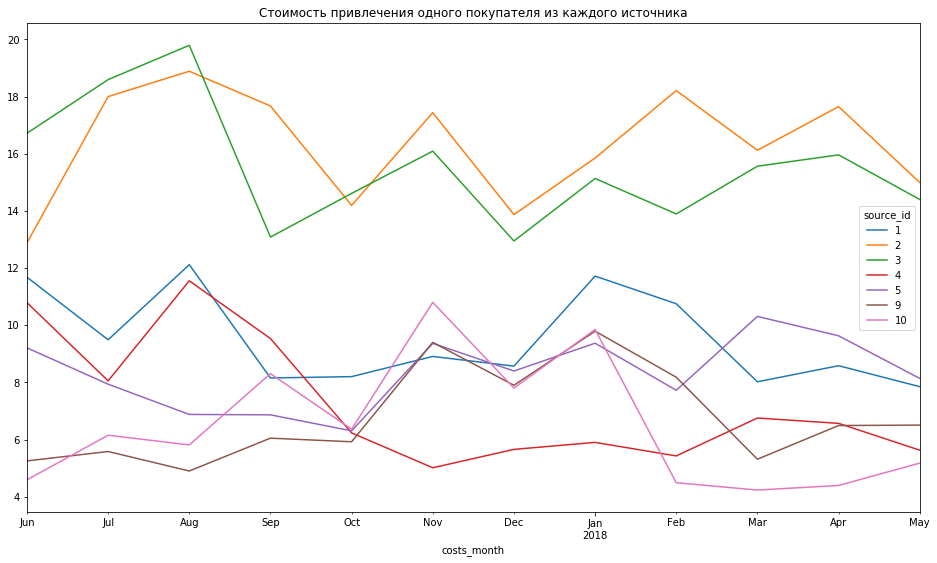

In [65]:
# найдем, первый рекламный источник, из которого пришел каждый пользователь
users = visits.sort_values('Start Ts').groupby('Uid').first()
users = users[['Source Id']]
buyers_for_cac = pd.merge(visits_orders, users, left_on='Uid', right_index=True)

buyers_daily = buyers_for_cac.groupby(['Source Id', 'first_order_dt']).agg({'Uid': 'count'}).reset_index()
buyers_daily.rename(columns={'Uid': 'n_buyers'}, inplace=True)
buyers_daily['first_order_dt'] = pd.to_datetime(buyers_daily['first_order_dt'])
buyers_daily.rename(columns={'Source Id':'source_id'}, inplace=True)


costs_ = pd.merge(buyers_daily, costs, left_on=['source_id', 'first_order_dt'], right_on=['source_id', 'dt'])
costs_['costs_per_buyer'] = costs_['costs']/costs_['n_buyers']

costs_.pivot_table(index=['costs_month'], columns='source_id', values='costs_per_buyer', aggfunc='mean').plot(
    figsize=(16,9), title='Стоимость привлечения одного покупателя из каждого источника')
plt.show()

In [66]:
# расчитаем средний САС по источникам
costs_.groupby('source_id').agg({'costs_per_buyer': 'mean'}).round(2)

,costs_per_buyer
source_id,
1,9.49
2,16.29
3,15.58
4,7.27
5,8.34
9,6.84
10,6.56


**ROMI**

Сводные таблицы расходов на маркетинг по каждому источнику, по месяцам

In [67]:
#переименовать заголовки нужно было гораздо раньше конечно
visits.columns = ['device', 'end_ts', 'source_id', 'start_ts', 'uid', 'session_year', 'session_month', 'session_week', 'session_date', 'ses_dur_sec']
orders.columns = ['buy_ts', 'revenue', 'uid','order_month', 'buy_dt']

<div class="alert alert-block alert-warning">
<b>Комментарий от ревьюера</b>

Да, было бы легче. :)

</div>

<div class="alert alert-block alert-info">
<b> Я попыталась сделать всё в логике замечания: все данные слепила в одну таблицу users, вместе со значениями сас по источнику и когорте. рассчитала как было в тренажере df['ltv'] = df['gp'] / df['n_buyers'] (gp = revenue в нашем случае, т.к. margin_rate 100%), соответственно и роми можно было добавить сюда простым делением лтв на сас, что я и сделала. а срезы уже дальше для визуализации и отображения накопленных данных сделать через query. Но что-то теперь вообще неправдоподобное вышло. Буду признательна за помощь!
</div>

<div class="alert alert-block alert-danger">
<b>Комментарий от ревьюера</b>

Основное здесь верно(что окупаемость не очень), но значения у нас получились совсем нереальными(слишком одинаковые). Если бы и правда было всё так плохо, то Афиша уже разорилась бы. :)

Попробуй сначала создать 1 общую таблицу для romi. А потом уже из неё выделять источики. Так получится меньше кода и будет легче найти ошибку. :)
    
Если будут вопросы,пиши, я постараюсь помочь!
</div>

<div class="alert alert-block alert-danger">
<b>Комментарий от ревьюера. V.2.</b>

Да, margin rate можно смело сокращать. Главное потом про него не забыть, если маржинальность другая будет. :)
    
Я попоробовала сделать объединение с самого начала и получилиь хорошие цифры. Посмотри,пожалуйста.
    
Добавь, пожалуйста, графики для остальных источников и выводы. :)
</div>

In [68]:
#first_orders.rename(columns={'Uid':'uid'}, inplace=True)
first_visits = visits.groupby('uid').agg({'start_ts': 'min'}).reset_index()
first_visits.columns = ['uid', 'first_visits_datetime']

first_visits['first_visits_date'] = first_visits['first_visits_datetime'].dt.date
first_visits['first_visits_month'] = first_visits['first_visits_datetime'].astype('datetime64[M]')

first_orders = orders.groupby('uid').agg({'buy_ts': 'min'}).reset_index()
first_orders.columns = ['uid', 'first_order_datetime']
first_orders = pd.merge(first_orders, first_visits, on='uid')

orders_new = pd.merge(orders, first_orders, on='uid')
orders_new['order_month'] = orders_new['buy_ts'].astype('datetime64[M]')
orders_new['first_order_month'] = orders_new['first_order_datetime'].astype('datetime64[M]')
users = visits.sort_values('start_ts').groupby('uid').first()
users = users[['source_id']]

orders_new = pd.merge(orders_new, users, left_on='uid', right_index=True)

In [69]:
cohort_sizes_t = (
    orders_new.groupby(['source_id', 'first_order_month'])
    .agg({'uid': 'nunique'})
    .reset_index()
)
cohort_sizes_t.columns = ['source_id', 'first_order_month', 'n_buyers']


cohorts_revenue_t = (
    orders_new.groupby(['source_id', 'first_order_month', 'order_month'])
    .agg({'revenue': 'sum'})
    .reset_index()
)
cohorts_revenue_t.columns = ['source_id', 'first_order_month', 'order_month', 'gp']


report_romi = pd.merge(cohort_sizes_t, cohorts_revenue_t, on=['source_id', 'first_order_month'])
report_romi['age'] = (
    report_romi['order_month'] - report_romi['first_order_month']
) / np.timedelta64(1, 'M')
report_romi['age'] = report_romi['age'].round().astype('int')
report_romi['ltv'] = report_romi['gp'] / report_romi['n_buyers']


report_romi = pd.merge(report_romi,costs.groupby(['source_id', 'costs_month']).agg({'costs': 'sum'}).reset_index(),
               left_on=['source_id', 'first_order_month'], right_on=['source_id', 'costs_month'])
report_romi = report_romi.drop(['costs_month'], axis = 1) 
report_romi['cac'] = report_romi['costs'] / report_romi['n_buyers']
report_romi['romi'] = report_romi['ltv'] / report_romi['cac']
display(report_romi.head())

,source_id,first_order_month,n_buyers,order_month,gp,age,ltv,costs,cac,romi
0,1,2017-06-01,190,2017-06-01,1378.70,0,7.256316,1125.61,5.924263,1.224847
1,1,2017-06-01,190,2017-07-01,414.98,1,2.184105,1125.61,5.924263,0.368671
2,1,2017-06-01,190,2017-08-01,419.43,2,2.207526,1125.61,5.924263,0.372625
3,1,2017-06-01,190,2017-09-01,714.24,3,3.759158,1125.61,5.924263,0.634536
4,1,2017-06-01,190,2017-10-01,811.20,4,4.269474,1125.61,5.924263,0.720676


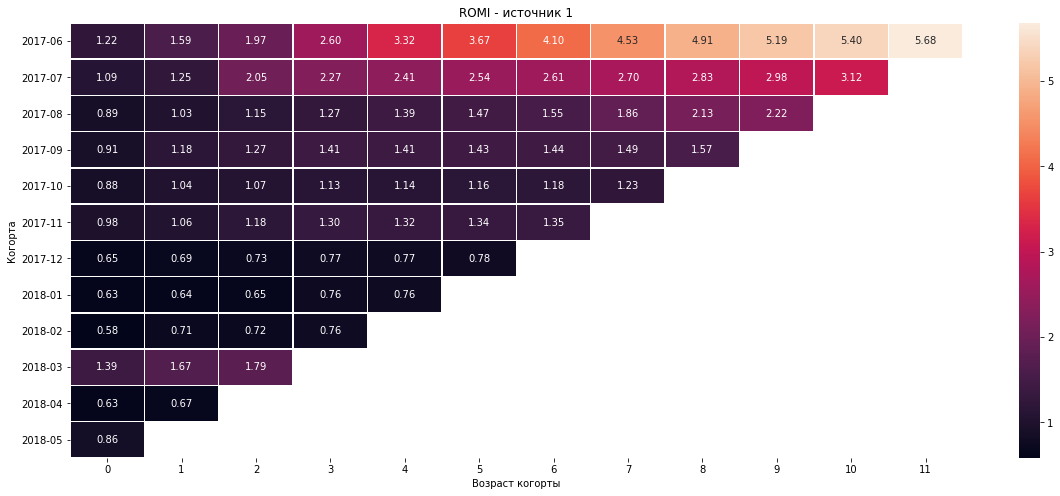

In [70]:
romi_1 = report_romi.query('source_id == 1')\
        .pivot_table(index='first_order_month', columns='age', values='romi', aggfunc='mean')\
        .cumsum(axis=1)
romi_1.round(2).fillna('')

plt.figure(figsize=(20, 8))
plt.title('ROMI - источник 1')
sns.heatmap(romi_1, annot=True, fmt=".2f", linewidths=.5,
           yticklabels=romi_1.cumsum(axis=1).round(2).index.strftime('%Y-%m'))
plt.xlabel('Возраст когорты')
plt.ylabel('Когорта')
plt.show()

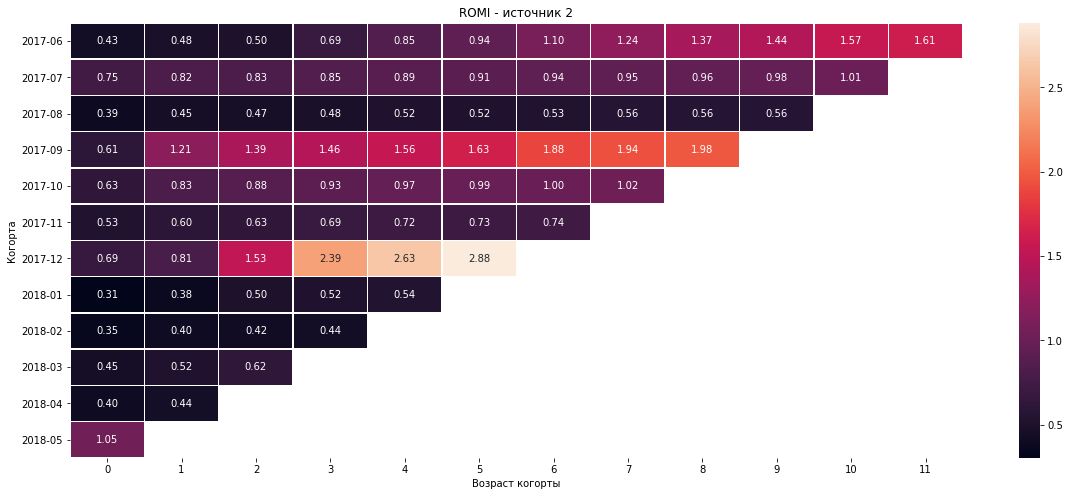

In [71]:
romi_2 = report_romi.query('source_id == 2')\
        .pivot_table(index='first_order_month', columns='age', values='romi', aggfunc='mean')\
        .cumsum(axis=1)
romi_2.round(2).fillna('')

plt.figure(figsize=(20, 8))
plt.title('ROMI - источник 2')
sns.heatmap(romi_2, annot=True, fmt=".2f", linewidths=.5,
           yticklabels=romi_2.cumsum(axis=1).round(2).index.strftime('%Y-%m'))
plt.xlabel('Возраст когорты')
plt.ylabel('Когорта')
plt.show()

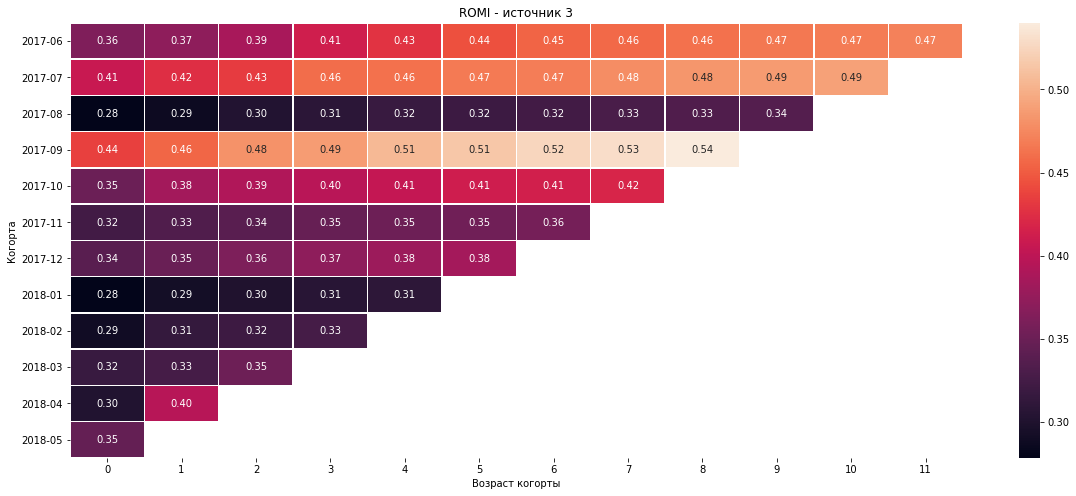

In [72]:
romi_3 = report_romi.query('source_id == 3')\
        .pivot_table(index='first_order_month', columns='age', values='romi', aggfunc='mean')\
        .cumsum(axis=1)
romi_3.round(2).fillna('')

plt.figure(figsize=(20, 8))
plt.title('ROMI - источник 3')
sns.heatmap(romi_3, annot=True, fmt=".2f", linewidths=.5,
           yticklabels=romi_3.cumsum(axis=1).round(2).index.strftime('%Y-%m'))
plt.xlabel('Возраст когорты')
plt.ylabel('Когорта')
plt.show()

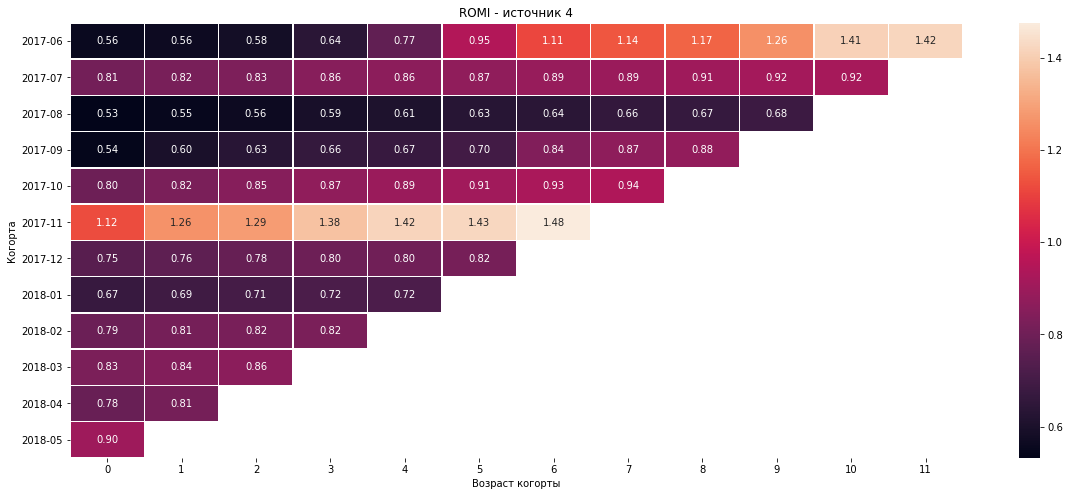

In [73]:
romi_4 = report_romi.query('source_id == 4')\
        .pivot_table(index='first_order_month', columns='age', values='romi', aggfunc='mean')\
        .cumsum(axis=1)
romi_4.round(2).fillna('')

plt.figure(figsize=(20, 8))
plt.title('ROMI - источник 4')
sns.heatmap(romi_4, annot=True, fmt=".2f", linewidths=.5,
           yticklabels=romi_4.cumsum(axis=1).round(2).index.strftime('%Y-%m'))
plt.xlabel('Возраст когорты')
plt.ylabel('Когорта')
plt.show()

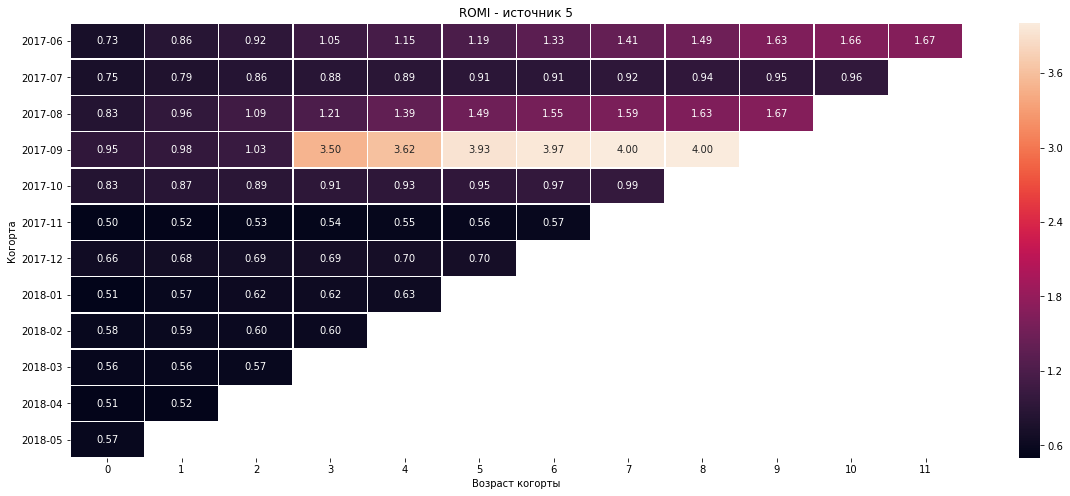

In [74]:
romi_5 = report_romi.query('source_id == 5')\
        .pivot_table(index='first_order_month', columns='age', values='romi', aggfunc='mean')\
        .cumsum(axis=1)
romi_5.round(2).fillna('')

plt.figure(figsize=(20, 8))
plt.title('ROMI - источник 5')
sns.heatmap(romi_5, annot=True, fmt=".2f", linewidths=.5,
           yticklabels=romi_5.cumsum(axis=1).round(2).index.strftime('%Y-%m'))
plt.xlabel('Возраст когорты')
plt.ylabel('Когорта')
plt.show()

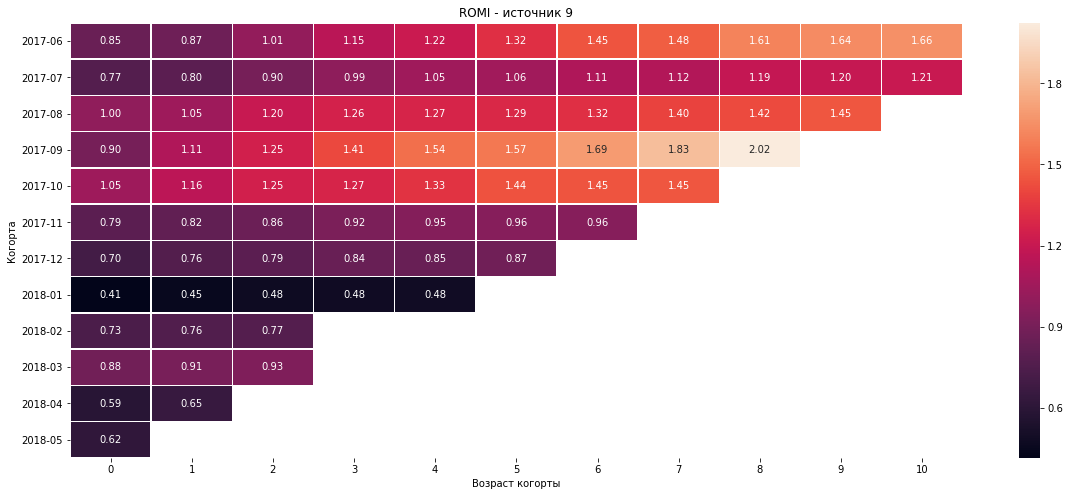

In [75]:
romi_9 = report_romi.query('source_id == 9')\
        .pivot_table(index='first_order_month', columns='age', values='romi', aggfunc='mean')\
        .cumsum(axis=1)
romi_9.round(2).fillna('')

plt.figure(figsize=(20, 8))
plt.title('ROMI - источник 9')
sns.heatmap(romi_9, annot=True, fmt=".2f", linewidths=.5,
           yticklabels=romi_9.cumsum(axis=1).round(2).index.strftime('%Y-%m'))
plt.xlabel('Возраст когорты')
plt.ylabel('Когорта')
plt.show()

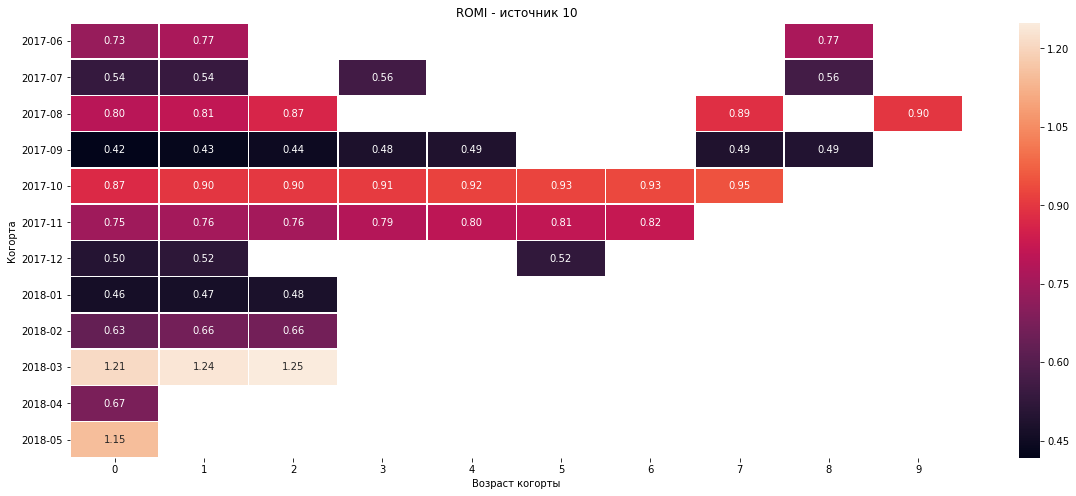

In [76]:
romi_10 = report_romi.query('source_id == 10')\
        .pivot_table(index='first_order_month', columns='age', values='romi', aggfunc='mean')\
        .cumsum(axis=1)
romi_10.round(2).fillna('')

plt.figure(figsize=(20, 8))
plt.title('ROMI - источник 10')
sns.heatmap(romi_10, annot=True, fmt=".2f", linewidths=.5,
           yticklabels=romi_10.cumsum(axis=1).round(2).index.strftime('%Y-%m'))
plt.xlabel('Возраст когорты')
plt.ylabel('Когорта')
plt.show()

**хотелось бы еще посмотреть, какой источник привел бОльшее количество покупателей и прибыли**

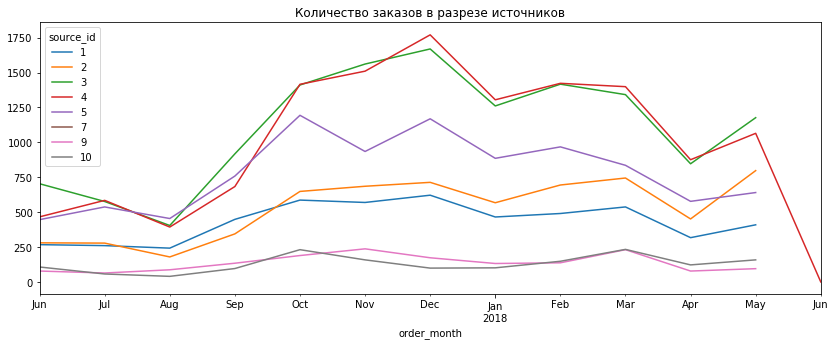

In [77]:
(orders_new.pivot_table(index='order_month', columns='source_id', values='uid', aggfunc='count').plot(figsize=(14,5), \
title='Количество заказов в разрезе источников'))
plt.show()

Здесь мы наглядно показали, что самые "дешевые" с точки зрения затрат на маркетинг источники (9 и 10) в действительности и работают хуже всех.

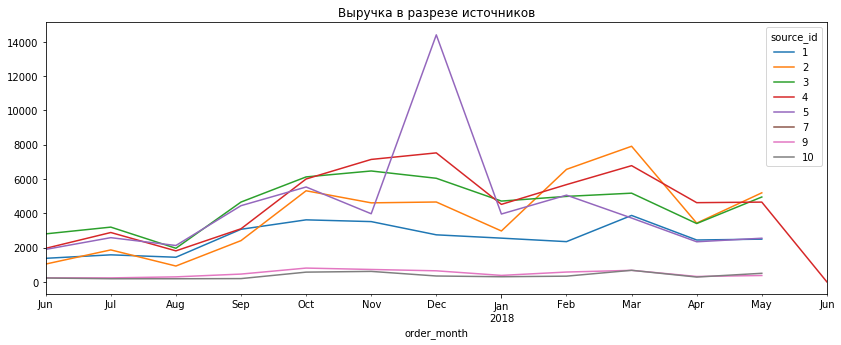

In [78]:
(orders_new.pivot_table(index='order_month', columns='source_id', values='revenue', aggfunc='sum').plot(figsize=(14,5), \
title='Выручка в разрезе источников'))
plt.show()

Ну а здесь мы еще и увидели, что непосредственно выручка с источников 9 и 10 стремится к нулю.

<div class="alert alert-block alert-success">
<b>Комментарий от ревьюера</b>

Отличная дополнительная работа!
</div>
<div class="alert alert-block alert-warning">
<b>Комментарий от ревьюера</b>

Выводы по графикам лучше писать прям радом с ними. :)
</div>

## Выводы и рекомендации

1. Источник: ориентируясь на затраты на маркетинг, САС (стоимость привлечения клиента) и ROMI (рентабельности инвестиций в маркетинг этого источника) можно сделать следующие выводы: источник №3 самый затратный, рентабельность у него маленькая. Самые бюджетные источники 1, 9, 10, причем рентабельность 9 значительно выше. Также неплохая рентабельность у 1 источника. Но мы посмотрели выручку и количество привлеченных пользователей в разрезе источников, которые показали, что 9 и 10 источник не принесли толком ни выручки, ни покупателей. Итог: по совокупности всех этих графиков, рентабельными источниками видится № 4 и 5 - они не требуют много затрат, оттуда достаточно хороший приток покупателей и заказов. *после правильного расчета РОМИ я бы добавила и 1 источник*
2. а) Среднее количество уникальных пользователей в день - 907, в неделю - 5724, в месяц - 23228. Наибольший всплеск пользователей наблюдается в ноябре-декабре. Каждый уникальный пользователь в среднем заходит один раз и длительность сессий короткая. Средний RR на второй месяц жизни 6%, самой "успешной" на второй месяц стала сентябрьская когорта. В целом, хорошую динамику показывают когорты июня и августа.
б) Так же как и в таблице RR - выделяются когорты июня и сентября. Средний чек, традиционно, перед Новым годом выше,а после него - яма. Покупки, в среднем, совершаются в первый же день посещения сайта - хороший знак. 
3. Самыми перспективными когортами, исходя их когортного анализа Retention Rate, являются когорта пользователей, пришедших в августе и сентябре. Неплохую динамику RR также показывает когорта июня.


<div class="alert alert-block alert-warning">
<b>Комментарий от ревьюера</b>

Мы проделали очень большую работу. Много чего узнали и у нас есть, что порекомендовать маркетологам. Будет очень классно расширить вывод. :)
</div>

<div class="alert alert-block alert-info">
Спасибо огромное за неоценимую помощь! Теперь всё встало на свои места, хоть и кругом голова уже, но ROMI для меня теперь ясен.
</div>

<div class="alert alert-block alert-success">
<b>Комментарий от ревьюера</b>

Я очень рада, что удалось разобраться с ROMI. Это один из самых сложных разделов здесь. Ты молодец! :)

</div>